In [1]:
import sys
import os
sys.path.insert(0, f'{os.getenv("HOME")}/Devel/simgio/PYsimgio/')


import simgio_utils as su
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd

In [2]:
n_executions = 20
n_tasks = 60

priorities = ['Set-10', 'Exclusive-FCFS', 'FairShare', 'Clairvoyant']

walking_mu = [5, 10, 20,  50, 100, 150, 250,  500, 1000, 1500, 2000, 3000, 4000, 5000]


In [3]:
# Loading the data
df_all = pd.DataFrame()

df_full = pd.DataFrame()

for mu in walking_mu:
    df, ev = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder=f'csv_clairvoyant_{mu}')  
    ev['mu'] = mu
    df_full['mu'] = mu
    df_all = pd.concat([df_all, ev])
    df_full = pd.concat([df_full, df])

# drop duplicated tests
#df_all = df_all.drop(df_all[(df_all.group=='clairvoyant') & (df_all.priority !='Set-10')].index)
#df_full = df_full.drop(df_full[(df_full.group=='clairvoyant') & (df_full.priority !='Set-10')].index)


In [4]:
df_clair = df_all.loc[df_all['priority'] == 'Clairvoyant'].reset_index()
df_exclusive = df_all.loc[df_all['priority'] == 'Exclusive-FCFS'].reset_index()
df_share = df_all.loc[df_all['priority'] == 'FairShare'].reset_index()
df_set10 = df_all.loc[df_all['priority'] == 'Set-10'].reset_index()

In [5]:
df_exclusive['norm'] = 1 - (df_exclusive['mean_stretch']/ df_clair['mean_stretch'])
df_share['norm'] = 1 - (df_share['mean_stretch']/ df_clair['mean_stretch'])
df_set10['norm'] = 1 - (df_set10['mean_stretch']/ df_clair['mean_stretch'])
df_clair['norm'] = 1 - (df_clair['mean_stretch']/ df_clair['mean_stretch'])

In [6]:
df_exclusive.norm.apply(lambda x : x *100)

0     -1.373318
1     -1.606964
2     -1.440141
3     -1.473434
4     -1.446125
         ...   
275   -1.694611
276   -1.431621
277   -1.642844
278   -1.699547
279   -1.664771
Name: norm, Length: 280, dtype: float64

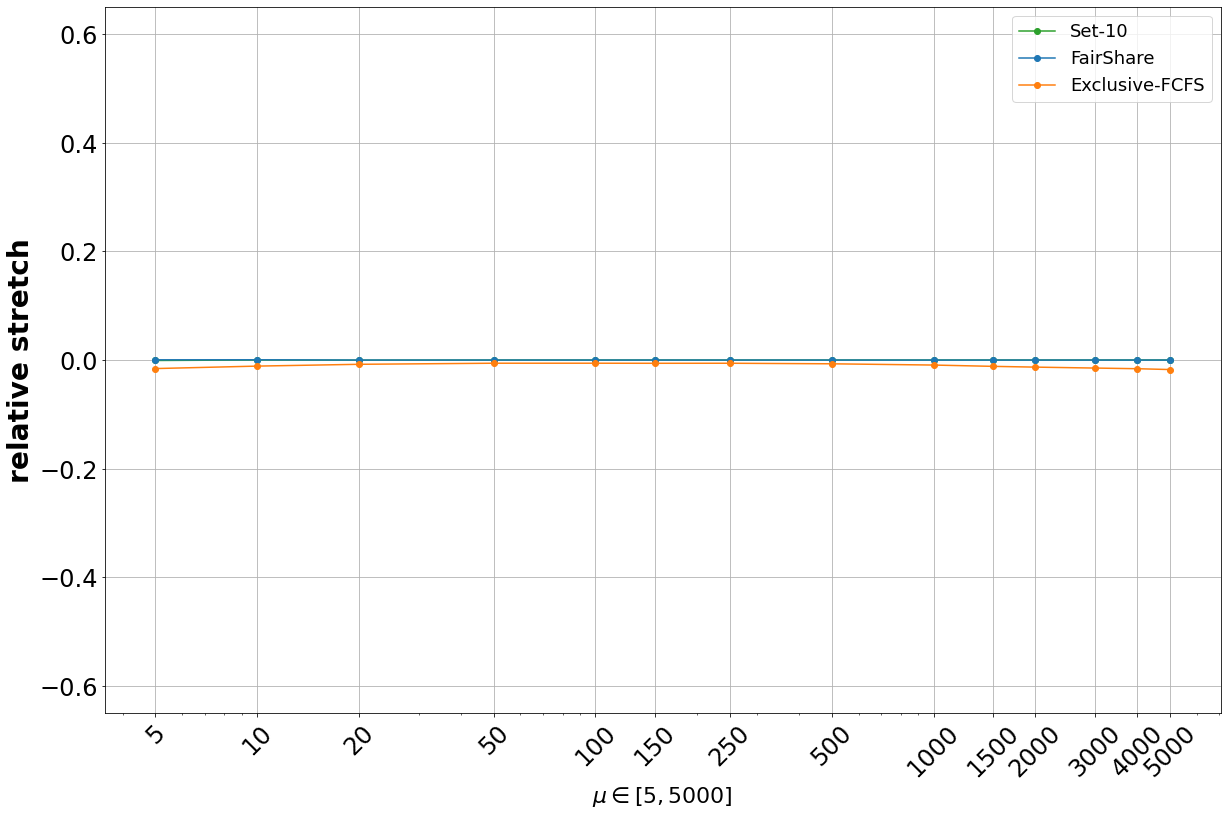

In [7]:
def get_normalized_values(df):
    values = []
    for mu in walking_mu:
        values.append(df.groupby("mu").get_group(mu).norm.mean())
    return values

fig, ax = plt.subplots(1, figsize=(20, 13))



ax.plot(walking_mu, get_normalized_values(df_set10), 'o-', color=su.color_palette['green'], label='Set-10')
ax.plot(walking_mu, get_normalized_values(df_share), 'o-', color=su.color_palette['blue'], label='FairShare')
ax.plot(walking_mu, get_normalized_values(df_exclusive), 'o-', color=su.color_palette['orange'], label='Exclusive-FCFS')


plt.ylabel(r'relative stretch', fontsize=28, fontweight='bold')
plt.xlabel(r'$\mu \in [5, 5000]$', fontweight='bold', fontsize=22)
plt.xticks(rotation=45)
plt.grid()

#ax.set_yscale('log')
ax.set_xscale('log')
lgnd=plt.legend(prop={'size': 18})
# lgnd.legendHandles[0]._sizes = [500]
# lgnd.legendHandles[1]._sizes = [500]

# plt.title("", fontweight='bold', fontsize=18)


ax.set_ylim([-0.65, 0.65])
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
# ax.yaxis.set_minor_formatter(StrMethodFormatter('{x:.2f}'))
# ax.set_xlim([1.04, 1.20])

ax.set_xticks(walking_mu)
ax.set_xticklabels([str(mu) for mu in walking_mu])
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=24)

# if save_to:
fig.savefig(f"graphs/clairvoyant_norm_all.pdf", format='pdf', dpi=1200)

plt.show()

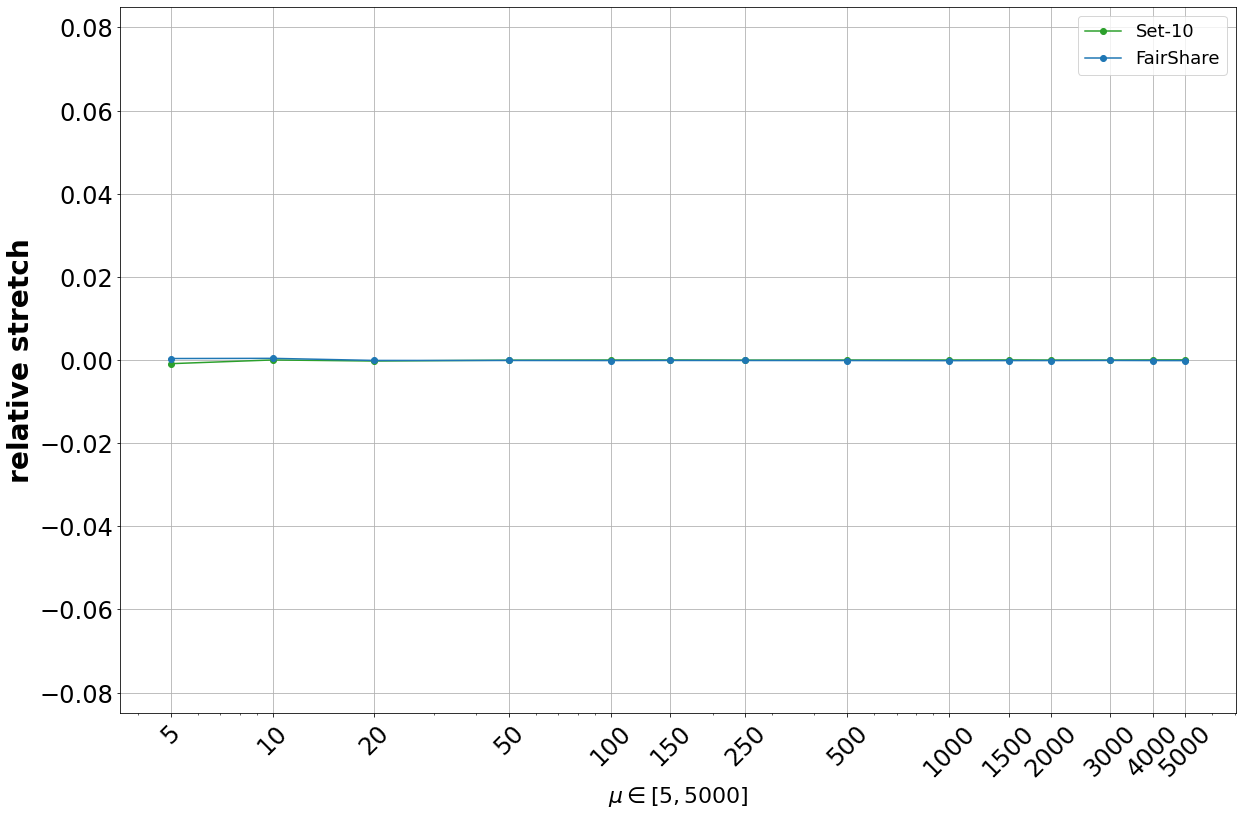

In [8]:
fig, ax = plt.subplots(1, figsize=(20, 13))



ax.plot(walking_mu, get_normalized_values(df_set10), 'o-', color=su.color_palette['green'], label='Set-10')
ax.plot(walking_mu, get_normalized_values(df_share), 'o-', color=su.color_palette['blue'], label='FairShare')
# ax.plot(walking_mu, values(df_exclusive), 'o-', color=su.color_palette['orange'], label='Exclusive-FCFS')


plt.ylabel(r'relative stretch', fontsize=28, fontweight='bold')
plt.xlabel(r'$\mu \in [5, 5000]$', fontweight='bold', fontsize=22)
plt.xticks(rotation=45)
plt.grid()

#ax.set_yscale('log')
ax.set_xscale('log')
lgnd=plt.legend(prop={'size': 18})
# lgnd.legendHandles[0]._sizes = [500]
# lgnd.legendHandles[1]._sizes = [500]

# plt.title("", fontweight='bold', fontsize=18)


ax.set_ylim([-0.085, 0.085])
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
# ax.yaxis.set_minor_formatter(StrMethodFormatter('{x:.2f}'))
# ax.set_xlim([1.04, 1.20])

ax.set_xticks(walking_mu)
ax.set_xticklabels([str(mu) for mu in walking_mu])
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=24)

# if save_to:
fig.savefig(f"graphs/clairvoyant_norm.pdf", format='pdf', dpi=1200)

plt.show()

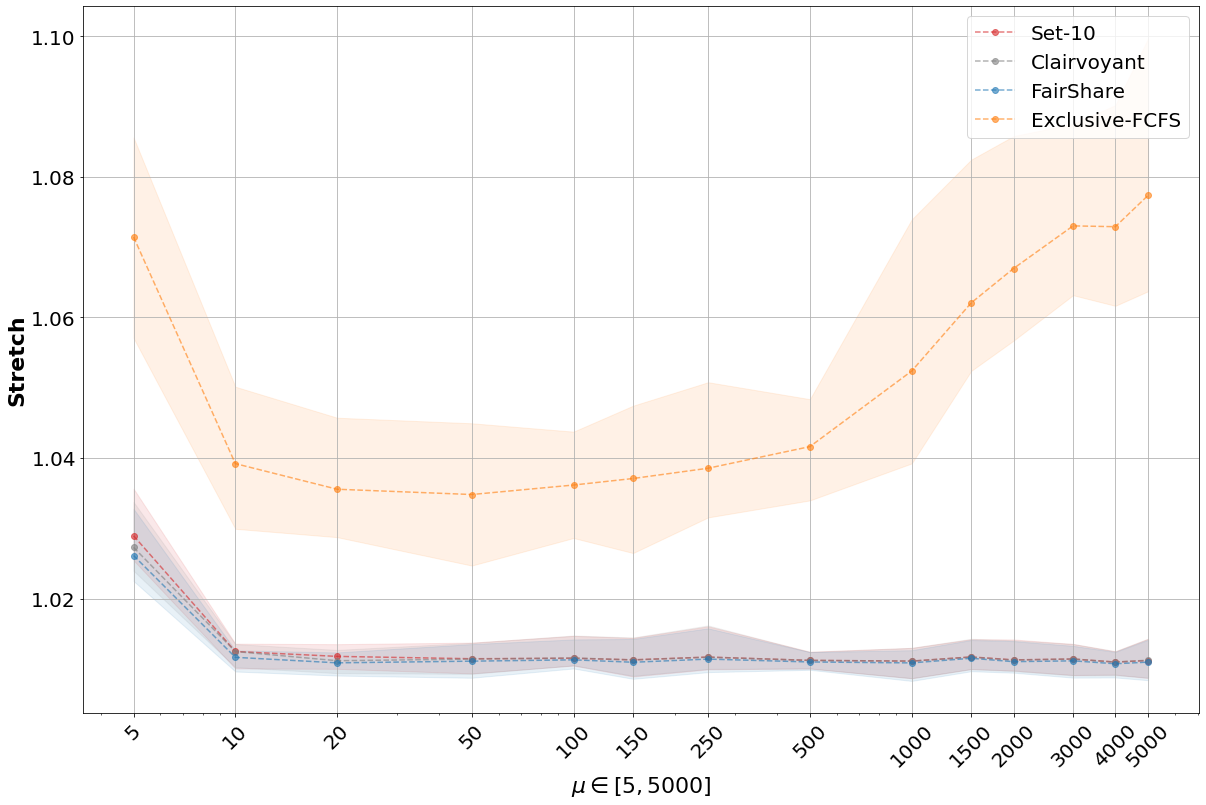

In [9]:
def get_max_stretch(df):
    mean_v = []
    min_v = []
    max_v = []
    for mu in walking_mu:
        min_v.append(df.groupby("mu").get_group(mu).max_stretch.min())
        mean_v.append(df.groupby("mu").get_group(mu).max_stretch.mean())
        max_v.append(df.groupby("mu").get_group(mu).max_stretch.max())
        
        
    return min_v, mean_v, max_v



set10_min, set10_mean, set10_max = get_max_stretch(df_set10)
clair_min, clair_mean, clair_max = get_max_stretch(df_clair)
fair_min, fair_mean, fair_max = get_max_stretch(df_share)
exclusive_min, exclusive_mean, exclusive_max = get_max_stretch(df_exclusive)

fig, ax = plt.subplots(1, figsize=(20, 13))



ax.plot(walking_mu, set10_mean, 'o--', color=su.color_palette['red'], alpha=0.6, label="Set-10" )
ax.fill_between(walking_mu, set10_min, set10_max, color=su.color_palette['red'], alpha=.1)

ax.plot(walking_mu, clair_mean, 'o--', color=su.color_palette['gray'], alpha=0.6, label="Clairvoyant")
ax.fill_between(walking_mu, clair_min, clair_max, color=su.color_palette['gray'], alpha=.1)

ax.plot(walking_mu, fair_mean, 'o--', color=su.color_palette['blue'], alpha=0.6, label="FairShare")
ax.fill_between(walking_mu, fair_min, fair_max, color=su.color_palette['blue'], alpha=.1)


ax.plot(walking_mu, exclusive_mean, 'o--', color=su.color_palette['orange'], alpha=0.6, label="Exclusive-FCFS")
ax.fill_between(walking_mu, exclusive_min, exclusive_max, color=su.color_palette['orange'], alpha=.1)


plt.ylabel(r'Stretch', fontsize=22, fontweight='bold')
plt.xlabel(r'$\mu \in [5, 5000]$', fontweight='bold', fontsize=22)
plt.xticks(rotation=45)
plt.grid()

# ax.set_yscale('log')
ax.set_xscale('log')
lgnd=plt.legend(prop={'size': 20})
lgnd.legendHandles[0]._sizes = [500]
lgnd.legendHandles[1]._sizes = [500]

# plt.title("", fontweight='bold', fontsize=18)

# ax.set_ylim([1.04, 1.20])
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
# ax.yaxis.set_minor_formatter(StrMethodFormatter('{x:.2f}'))
# ax.set_xlim([1.04, 1.20])

ax.set_xticks(walking_mu)
ax.set_xticklabels([str(mu) for mu in walking_mu])
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

# if save_to:
fig.savefig(f"graphs/clairvoyant_stretch.pdf", format='pdf', dpi=1200)

plt.show()

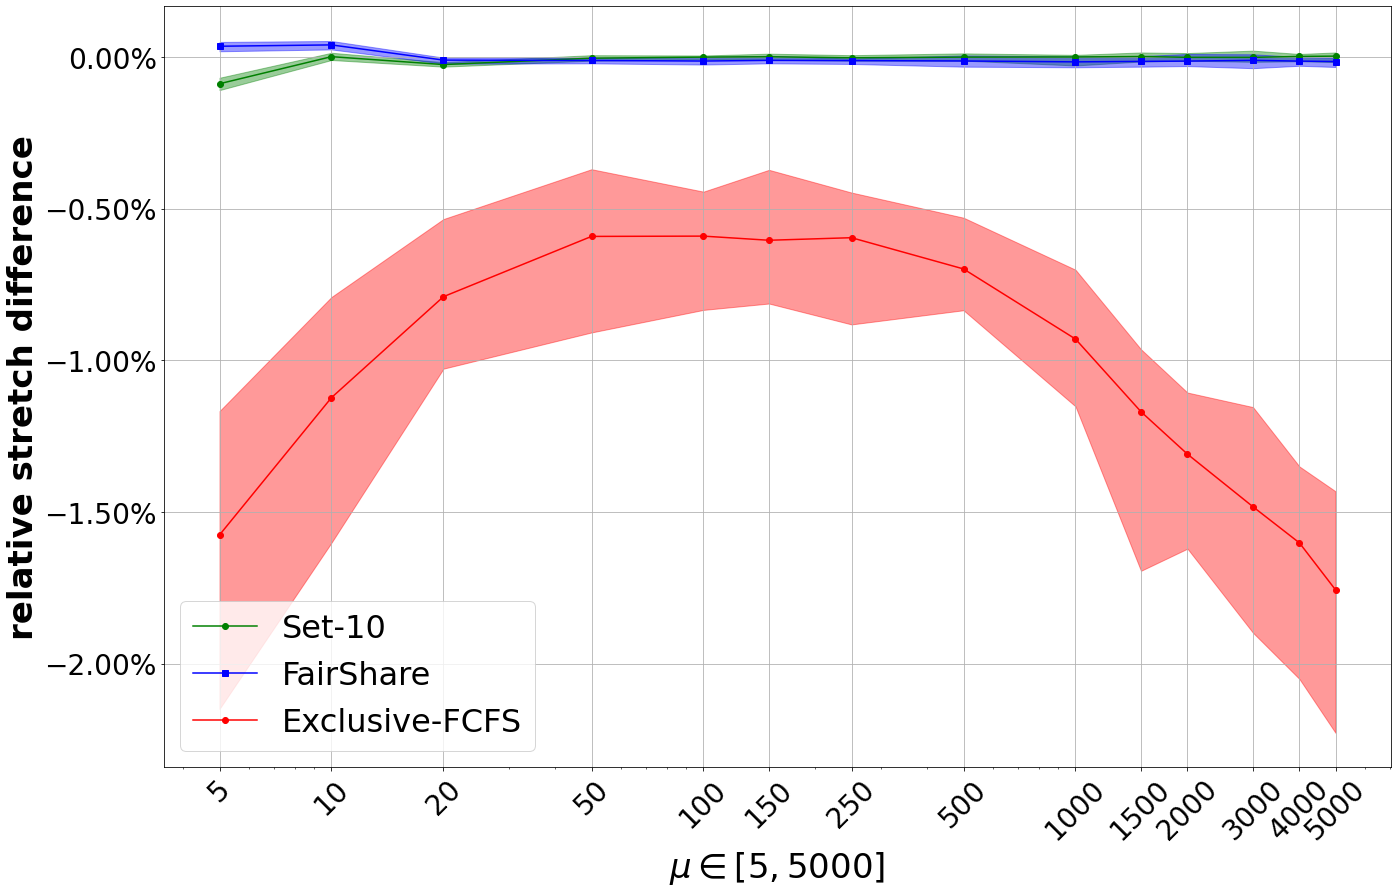

In [10]:
import matplotlib.ticker as mtick

label_fontSize = 34
tick_labelSize = 28
legend_fontSize = 32


def plot_graph02():
    def get_normalized_values(df):
        values = []
        max_v = []
        min_v = []
        for mu in walking_mu:
            values.append(df.groupby("mu").get_group(mu).norm.mean() * 100)
            max_v.append(df.groupby("mu").get_group(mu).norm.max()* 100)
            min_v.append(df.groupby("mu").get_group(mu).norm.min()* 100)
        return values, max_v, min_v

    fig, ax = plt.subplots(1, figsize=(22, 14))

    mean_set10, max_set10, min_set10 = get_normalized_values(df_set10)
    mean_share, max_share, min_share = get_normalized_values(df_share)
    mean_exclusive, max_exclusive, min_exclusive = get_normalized_values(df_exclusive)

    ax.plot(walking_mu, mean_set10, 'o-', color='green', label='Set-10')
    ax.fill_between(walking_mu, min_set10, max_set10, color='green', alpha=.4)

    ax.plot(walking_mu, mean_share, 's-', color='blue', label='FairShare')
    ax.fill_between(walking_mu, min_share, max_share, color='blue', alpha=.4)

    ax.plot(walking_mu, mean_exclusive, 'o-', color='red',
            label='Exclusive-FCFS')
    ax.fill_between(walking_mu, min_exclusive, max_exclusive, color='red', alpha=.4)

    plt.ylabel(r'relative stretch difference', fontsize=label_fontSize, fontweight='bold')
    plt.xlabel(r'$\mu \in [5, 5000]$', fontweight='bold', fontsize=label_fontSize)
    plt.xticks(rotation=45)
    plt.grid()

    #ax.set_yscale('log')
    ax.set_xscale('log')
    lgnd = plt.legend(prop={'size': legend_fontSize})


    #ax.set_ylim([-75, 10])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    ax.set_xticks(walking_mu)
    ax.set_xticklabels([str(mu) for mu in walking_mu])
    ax.tick_params(axis='both', which='major', labelsize=tick_labelSize)
    ax.tick_params(axis='both', which='minor', labelsize=tick_labelSize)

    fig.savefig(f"clairvoyant_norm.pdf", format='pdf', dpi=1200)

plot_graph02()